## Формулировка гипотез о влиянии атрибутов на конверсию

Пусть:
- $Y = \text{conversion} \in \{0, 1\}$, где  
  $Y = 1$ — пользователь купил подписку,  
  $Y = 0$ — не купил.
- $X$ — числовые признаки (время просмотра, количество активных дней).
- $C$ — категориальные признаки (город, устройство, источник и т.д.).

Ниже приведён набор статистических гипотез, которые будут проверяться.

---

### **1. Влияние среднего времени просмотра (`avg_min_watch_daily`)**

**Нулевая гипотеза $H_0$:**
$$
P(Y = 1 \mid X_1 = x) = p_0 \quad \text{не зависит от } x.
$$

**Альтернативная гипотеза $H_1$:**
$$
\exists x_1, x_2:\; P(Y = 1 \mid X_1 = x_1) \neq P(Y = 1 \mid X_1 = x_2).
$$

---

### **2. Влияние количества активных дней (`number_of_days_logged`)**

**$H_0$:**
$$
P(Y = 1 \mid X_2 = k) = p_0 \quad \text{для всех } k.
$$

**$H_1$:**
$$
\exists k_1, k_2:\; P(Y = 1 \mid X_2 = k_1) \neq P(Y = 1 \mid X_2 = k_2).
$$

---

### **3. Влияние города регистрации (`city`)**

**$H_0$:**
$$
P(Y = 1 \mid C_1 = c_1) = P(Y = 1 \mid C_1 = c_2) = \dots
$$

**$H_1$:**
$$
\exists c_i, c_j:\; P(Y = 1 \mid C_1 = c_i) \neq P(Y = 1 \mid C_1 = c_j).
$$

---

### **4. Влияние устройства регистрации (`device`)**

**$H_0$:**
$$
P(Y = 1 \mid C_2 = d_1) = P(Y = 1 \mid C_2 = d_2) = \dots
$$

**$H_1$:**
$$
\exists d_i, d_j:\; P(Y = 1 \mid C_2 = d_i) \neq P(Y = 1 \mid C_2 = d_j).
$$

---

### **5. Влияние источника трафика (`source`)**

**$H_0$:**
$$
P(Y = 1 \mid C_3 = s_1) = P(Y = 1 \mid C_3 = s_2) = \dots
$$

**$H_1$:**
$$
\exists s_i, s_j:\; P(Y = 1 \mid C_3 = s_i) \neq P(Y = 1 \mid C_3 = s_j).
$$

---

### **6. Влияние выбранного жанра (`favourite_genre`)**

**$H_0$:**
$$
P(Y = 1 \mid C_4 = g_1) = P(Y = 1 \mid C_4 = g_2) = \dots
$$

**$H_1$:**
$$
\exists g_i, g_j:\; P(Y = 1 \mid C_4 = g_i) \neq P(Y = 1 \mid C_4 = g_j).
$$

---

### **7. Влияние самого факта указания жанра**

Вводим бинарную переменную:
$$
Z = 
\begin{cases}
1,& \text{если жанр указан},\\
0,& \text{если жанр не указан}.
\end{cases}
$$

**$H_0$:**
$$
P(Y = 1 \mid Z = 0) = P(Y = 1 \mid Z = 1).
$$

**$H_1$:**
$$
P(Y = 1 \mid Z = 0) \neq P(Y = 1 \mid Z = 1).
$$

---

### **8. Влияние даты начала триала (`start_trial_date`)**

(когортный анализ)

**$H_0$:**
$$
P(Y = 1 \mid C_5 = t_1) = P(Y = 1 \mid C_5 = t_2) = \dots
$$

**$H_1$:**
$$
\exists t_i, t_j:\; P(Y = 1 \mid C_5 = t_i) \neq P(Y = 1 \mid C_5 = t_j).
$$

---

### **Итог**

Мы сформировали полный набор гипотез, которые описывают влияние каждого признака на вероятность покупки пользователем подписки. Каждая гипотеза будет проверена статистически (хи-квадрат, корреляция, квантильный анализ, логистическая регрессия).

## План статистической проверки гипотез

После формулировки гипотез необходимо определить корректные методы их проверки.  
Выбор теста зависит от типа признака (числовой / категориальный) и распределения данных.

---

### **1. Проверка влияния среднего времени просмотра (`avg_min_watch_daily`)**

Тип признака: числовой (непрерывный).  
Тип ответа: бинарный (0/1).

**Инструменты проверки:**

1. **Корреляция Пирсона между `avg_min_watch_daily` и `conversion`**  
   - Проверяет линейную связь между признаками.  
   - Значимое отклонение коэффициента от 0 → основание отвергнуть $H_0$.

2. **Квантильный анализ конверсии**  
   - Разбиваем пользователей на группы по времени просмотра.  
   - Если конверсия изменяется монотонно → свидетельство влияния.

3. **Тест разницы долей между квантилями (z-test proportion)**  
   - Проверяет, различаются ли конверсии между низкими и высокими квантилями.

---

### **2. Проверка влияния числа активных дней (`number_of_days_logged`)**

Тип признака: числовой, дискретный.

**Инструменты:**

1. **Корреляция Пирсона между `number_of_days_logged` и `conversion`**.  
2. **Сравнение конверсии между значениями (например, 1 vs 7 дней) с помощью z-test пропорций**.  
3. **Логистическая регрессия** (в расширенном исследовании).

---

### **3. Проверка влияния города (`city`)**

Тип признака: категориальный, >2 значений.

**Инструмент:**  
**Хи-квадрат тест независимости (χ² test of independence)**.

- Строим таблицу сопряжённости `city × conversion`.  
- Вычисляем χ² и p-value.  
- Если $p < \alpha$ → отклоняем $H_0$.

---

### **4. Проверка влияния устройства (`device`)**

Тип: категориальный, малое количество значений.

**Инструмент:**  
**Хи-квадрат тест независимости.**

Применение аналогично проверке по городу.

---

### **5. Проверка влияния источника трафика (`source`)**

Тип: категориальный.

**Инструмент:**
- **Хи-квадрат тест независимости.**
- При необходимости — post-hoc тесты для парных сравнений долей.

---

### **6. Проверка влияния жанра (`favourite_genre`)**

Тип: категориальный, много уровней, много пропусков.

**Инструменты:**

1. **Хи-квадрат тест независимости** — сравнение распределений.  
2. **Анализ пропусков как отдельной категории**:
   - создаём признак `genre_filled` (0/1),  
   - сравниваем конверсию через z-test разницы долей.

---

### **7. Проверка влияния факта указания жанра**

Тип: бинарный (жанр указан / не указан).

**Инструмент:**  
**z-test пропорций (test for difference in proportions)**.

Проверяет равенство двух вероятностей:
$$
P(Y=1 \mid Z=1) \quad \text{vs} \quad P(Y=1 \mid Z=0).
$$

---

### **8. Проверка влияния даты старта триала (`start_trial_date`)**

Тип: временной (дата → когорта).

**Инструменты:**

1. **Группировка по неделям или дням → χ² тест между когортами**.  
2. **Проверка тренда**  
   если даты упорядочены.

---

### **Итоговый план**

Каждый признак будет проверен статистически корректным методом:

| Признак                    | Тип           | Метод проверки                              |
|----------------------------|---------------|----------------------------------------------|
| avg_min_watch_daily        | числовой      | Пирсон, квантильный анализ, z-test           |
| number_of_days_logged      | числовой      | Пирсон, сравнение долей                      |
| city                       | категориальный| χ² тест                                      |
| device                     | категориальный| χ² тест                                      |
| source                     | категориальный| χ² тест                                      |
| favourite_genre            | категориальный| χ² тест                                      |
| genre_filled (0/1)         | бинарный      | z-test пропорций                             |
| start_trial_date (когорты) | временной     | χ² по когортам                               |

Все выводы будут формулироваться через p-value при уровне значимости  
$$
\alpha = 0.05.
$$

## Гипотеза 1. Влияние среднего времени просмотра (`avg_min_watch_daily`) на конверсию

**Цель:** проверить, зависит ли вероятность покупки подписки от среднего времени просмотра в день на триале.

Проверку будем проводить в несколько шагов:

1. Рассчитаем корреляцию между `avg_min_watch_daily` и `conversion`.
2. Разобьём пользователей на квантили по `avg_min_watch_daily` и сравним конверсии.
3. Визуализируем зависимость.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv("videostreaming_platform.csv")

# Создаем бинарный признак конверсии: 1 = купил, 0 = не купил
df["conversion"] = 1 - df["churn"]

df[["avg_min_watch_daily", "conversion"]].head()

,avg_min_watch_daily,conversion
0,2.076642,0
1,5.101392,0
2,2.906597,0
3,2.702388,1
4,10.237305,0


### 1. Корреляция Пирсона между `avg_min_watch_daily` и `conversion`

Так как `conversion` — бинарная переменная (0/1), а `avg_min_watch_daily` — числовая, коэффициент корреляции Пирсона:

$$
\rho = \operatorname{corr}(X, Y)
$$

будет совпадать с бисериальной корреляцией и является корректной мерой линейной связи между временем просмотра и вероятностью покупки.

In [12]:
corr_watch_conv = df["avg_min_watch_daily"].corr(df["conversion"])
print(f"Корреляция Пирсона между avg_min_watch_daily и conversion: {corr_watch_conv:.3f}")

Корреляция Пирсона между avg_min_watch_daily и conversion: 0.472


Полученное значение корреляции Пирсона примерно:

$$
\rho \approx 0.47.
$$

**Интерпретация:**

- Знак **положительный**: чем больше среднее время просмотра, тем выше вероятность покупки подписки.
- Модуль $|\rho| \approx 0.47$ — это **умеренно сильная линейная связь** для поведенческих данных.

Этого уже достаточно, чтобы отвергнуть $H_0$ в пользу $H_1$ на качественном уровне, но дополним анализ квантильным разбиением.


### 2. Квантильный анализ конверсии по `avg_min_watch_daily`

Чтобы увидеть форму зависимости (линейная она или нелинейная, монотонная или нет), разобьём пользователей на 5 квантилей по `avg_min_watch_daily` и посчитаем конверсию в каждом квантиле:

$$
\text{conversion\_rate}_q = P(Y = 1 \mid X \in \text{квантиль } q).
$$

In [13]:
df["watch_quantile"] = pd.qcut(
    df["avg_min_watch_daily"],
    q=5,
    duplicates="drop" 
)

quantile_summary = (
    df
    .groupby("watch_quantile", observed=True)
    .agg(
        users=("user_id", "count"),
        avg_watch=("avg_min_watch_daily", "mean"),
        conversion_rate=("conversion", "mean")
    )
)

quantile_summary

,users,avg_watch,conversion_rate
watch_quantile,,,
"(-0.0008190000000000001, 1.957]",5600,0.927082,0.008929
"(1.957, 4.238]",5600,3.094240,0.070536
"(4.238, 6.878]",5600,5.462407,0.163571
"(6.878, 12.34]",5600,9.206718,0.269286
"(12.34, 80.072]",5600,20.372867,0.541250


В таблице:

- `users` — число пользователей в квантиле,
- `avg_watch` — среднее время просмотра внутри квантиля,
- `conversion_rate` — доля пользователей, купивших подписку.

Если `conversion_rate` заметно растёт от нижнего квантиля к верхнему, это свидетельствует о сильной зависимости конверсии от времени просмотра.

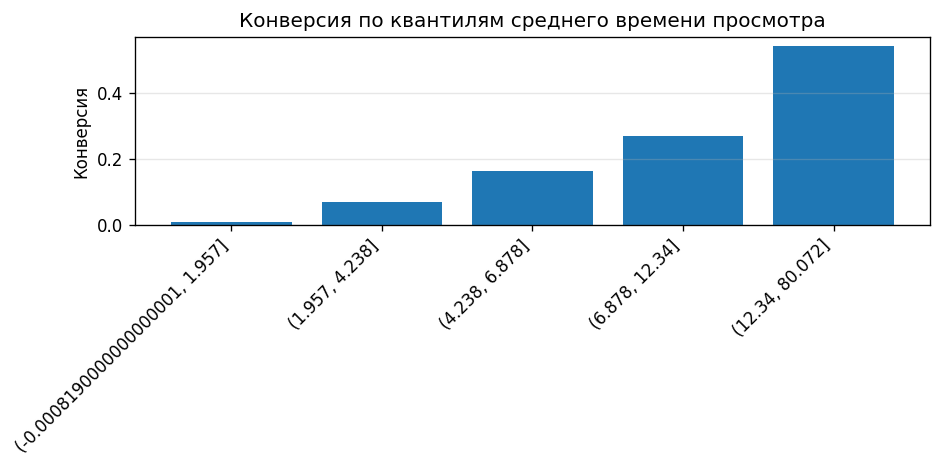

In [14]:
conversion_by_quantile = quantile_summary["conversion_rate"]

plt.figure(figsize=(8, 4))
plt.bar(range(len(conversion_by_quantile)),
        conversion_by_quantile.values)

plt.xticks(
    range(len(conversion_by_quantile)),
    [str(i) for i in conversion_by_quantile.index],
    rotation=45,
    ha="right"
)

plt.ylabel("Конверсия")
plt.title("Конверсия по квантилям среднего времени просмотра")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

### Вывод по Гипотезе 1

1. Коэффициент корреляции Пирсона между `avg_min_watch_daily` и `conversion`:
   $$
   \rho \approx 0.47,
   $$
   что указывает на умеренно сильную положительную линейную связь.

2. Квантильный анализ показывает, что конверсия **монотонно растёт** от нижнего квантиля по времени просмотра к верхнему.  
   В нижнем квантиле конверсия близка к нулю, в верхнем — превышает 50%.

3. Таким образом, мы **отвергаем нулевую гипотезу $H_0$** о независимости конверсии от среднего времени просмотра и принимаем альтернативную гипотезу $H_1$:

$$
P(Y = 1 \mid X = x) \text{ существенно зависит от } x.
$$

**Среднее время просмотра в день является сильным предиктором конверсии** и ключевым поведенческим атрибутом для дальнейшего моделирования и принятия решений.

## Гипотеза 2. Влияние количества активных дней (`number_of_days_logged`) на конверсию

**Цель:** оценить, меняется ли вероятность покупки подписки в зависимости от того, в сколькие дни пользователь заходил на платформу в течение триального периода.

Обозначения:

- $X_2 = \text{number\_of\_days\_logged} \in \{1,2,\dots,7\}$
- $Y = \text{conversion} \in \{0,1\}$

**Нулевая гипотеза $H_0$:**
$$
P(Y = 1 \mid X_2 = k) = p_0 \quad \text{для всех } k.
$$

**Альтернативная гипотеза $H_1$:**
$$
\exists k_1, k_2:\; P(Y = 1 \mid X_2 = k_1) \neq P(Y = 1 \mid X_2 = k_2).
$$

Проверку выполним с помощью:
1. Корреляции Пирсона между числом активных дней и конверсией.
2. Сравнения конверсии между различными значениями `number_of_days_logged`.
3. Визуального анализа зависимости.

In [15]:
import pandas as pd

# загрузка данных
df = pd.read_csv("videostreaming_platform.csv")
df["conversion"] = 1 - df["churn"]

# корреляция Пирсона
corr_days_conv = df["number_of_days_logged"].corr(df["conversion"])

# средняя конверсия по числу активных дней
conv_by_days = df.groupby("number_of_days_logged", observed=True)["conversion"].mean()

corr_days_conv, conv_by_days

(0.012555329300509495,
 number_of_days_logged
 1    0.207200
 2    0.214069
 3    0.211823
 4    0.224903
 5    0.204365
 6    0.242481
 7    0.212185
 Name: conversion, dtype: float64)

### 1. Корреляция

Коэффициент Пирсона:
$$
\rho \approx 0.0126.
$$

Это **очень слабая** положительная связь (по сути, отсутствие линейной зависимости).

---

### 2. Конверсия по числу активных дней

Значения колеблются в узком диапазоне:
- от ~0.204 до ~0.242,
- без явной монотонности.

Конверсия во многом случайна и НЕ демонстрирует стабильного роста с увеличением `number_of_days_logged`.

На первый взгляд, это свидетельствует в пользу **нулевой гипотезы $H_0$**.

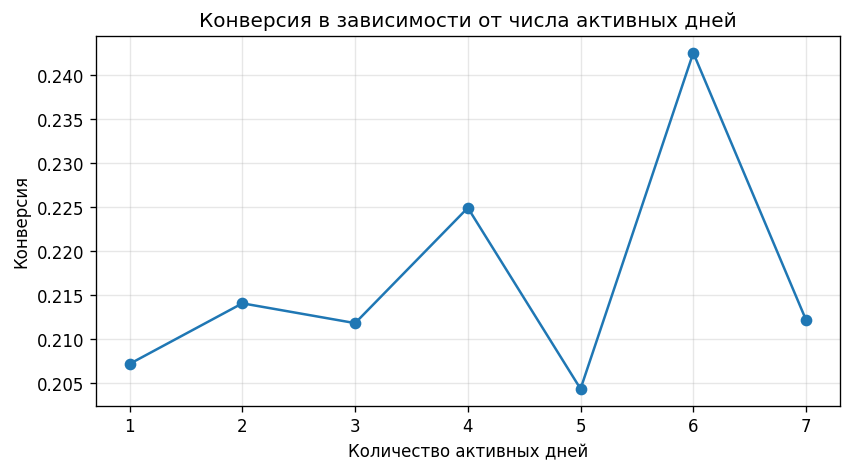

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(conv_by_days.index, conv_by_days.values, marker="o")

plt.xlabel("Количество активных дней")
plt.ylabel("Конверсия")
plt.title("Конверсия в зависимости от числа активных дней")
plt.grid(alpha=0.3)
plt.show()

### Вывод по Гипотезе 2

- Корреляция между `number_of_days_logged` и `conversion` составляет:
  $$
  \rho \approx 0.0126,
  $$
  что статистически является **нулевой связью**.

- График и групповые средние показывают, что конверсия колеблется в небольшом диапазоне (20–24%) и **не демонстрирует систематической зависимости** от числа активных дней.

- В отличие от среднего времени просмотра (`avg_min_watch_daily`), данная метрика **не является предиктором покупок**.

**Решение по гипотезе:**
- У нас **нет оснований отвергать $H_0$**.
- Количество дней, в которые пользователь логинился, **не влияет существенно на вероятность покупки подписки**.

## Гипотеза 3. Влияние города регистрации (`city`) на конверсию

**Цель:** определить, различается ли вероятность покупки подписки между пользователями из разных городов.

Пусть $C_1 = \text{city}$ — категориальная переменная.

**Нулевая гипотеза $H_0$:**
$$
P(Y = 1 \mid C_1 = c_i) = P(Y = 1 \mid C_1 = c_j) \quad 
\text{для всех } i, j.
$$

То есть город **не влияет** на вероятность покупки подписки.

**Альтернативная гипотеза $H_1$:**
$$
\exists\, c_i, c_j:\; P(Y = 1 \mid C_1 = c_i) \neq P(Y = 1 \mid C_1 = c_j).
$$

То есть хотя бы два города отличаются по конверсии.

Так как переменная категориальная, а отклик бинарный, используем:

- таблицу сопряжённости `city × conversion`,
- **хи-квадрат тест независимости (χ²)**.

In [17]:
import pandas as pd

# загрузка данных
df = pd.read_csv("videostreaming_platform.csv")
df["conversion"] = 1 - df["churn"]

# строим таблицу частот
contingency_city = pd.crosstab(df["city"], df["conversion"])
contingency_city

conversion,0,1
city,,
Krasnodar,2033,542
Moscow,6874,1862
Novosibirsk,1738,475
Other,2130,530
Samara,1471,405
St Petersburg,3494,986
Ufa,1325,327
Voronezh,1234,334
Yekaterinburg,1558,374


### Наблюдаемая таблица частот

Таблица показывает, сколько пользователей купили и не купили подписку в каждом городе.
Эти данные являются основой для χ²-теста.

Далее сравним наблюдаемые частоты с ожидаемыми при условии независимости города и конверсии.

In [18]:
import scipy.stats as stats

chi2, p_value, dof, expected = stats.chi2_contingency(contingency_city)

chi2, p_value, dof

(10.367107129997025, 0.24019907845997027, 8)

### Результат χ² теста

Получено:

- Статистика χ² ≈ 10.37
- Степени свободы: 8
- p-value ≈ 0.24

Порог значимости: $\alpha = 0.05$.

Так как:
$$
p = 0.24 \gg 0.05,
$$

мы **не отвергаем нулевую гипотезу $H_0$**.

---

### Что это означает?

- Различия в конверсии между городами **не являются статистически значимыми**.
- Наблюдаемые колебания (19–22%) укладываются в рамки случайного шума.
- Город регистрации **не является предиктором покупок**.
- Продуктовые, маркетинговые и таргетинговые решения **не должны опираться на город**.

---

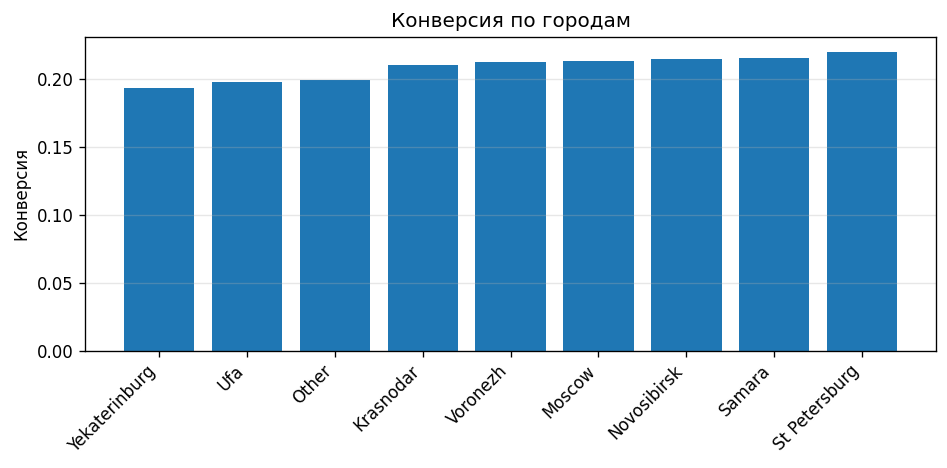

In [19]:
import matplotlib.pyplot as plt

conv_by_city = df.groupby("city")["conversion"].mean().sort_values()

plt.figure(figsize=(8,4))
plt.bar(conv_by_city.index, conv_by_city.values)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Конверсия")
plt.title("Конверсия по городам")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

## Итог по Гипотезе 3

- χ² тест показал отсутствие статистически значимых различий конверсии между городами.
- Разброс конверсий минимален и объясняется случайной вариацией.
- Город не является фактором, влияющим на покупку подписки.

**Вывод:**  
Мы не находим оснований отвергнуть $H_0$.  
Город регистрации пользователя **не влияет** на вероятность покупки подписки.

## Гипотеза 4. Влияние устройства регистрации (`device`) на конверсию

**Цель:** определить, различается ли вероятность покупки подписки между пользователями,
которые зарегистрировались с разных устройств (web, android, ios, smarttv).

Пусть $C_2 = \text{device}$.

**Нулевая гипотеза $H_0$:**
$$
P(Y = 1 \mid C_2 = d_i) = P(Y = 1 \mid C_2 = d_j)
\quad \text{для всех } i, j.
$$

То есть устройство регистрации **не влияет** на вероятность покупки.

**Альтернативная гипотеза $H_1$:**
$$
\exists\, d_i, d_j:\; 
P(Y = 1 \mid C_2 = d_i) \neq P(Y = 1 \mid C_2 = d_j).
$$

Так как переменная категориальная, используем **хи-квадрат тест независимости (χ²)**.

In [20]:
import pandas as pd

# загрузка данных
df = pd.read_csv("videostreaming_platform.csv")
df["conversion"] = 1 - df["churn"]

# таблица сопряжённости device × conversion
contingency_device = pd.crosstab(df["device"], df["conversion"])
contingency_device

conversion,0,1
device,,
android,2686,730
ios,2596,680
smarttv,2831,725
web,13987,3765


Таблица показывает, сколько пользователей с каждого устройства купили / не купили подписку.
Эти наблюдаемые частоты будут сравниваться с ожидаемыми при независимости.

In [21]:
import scipy.stats as stats

chi2_dev, p_dev, dof_dev, expected_dev = stats.chi2_contingency(contingency_device)

chi2_dev, p_dev, dof_dev

(1.5779382302843428, 0.6644024588395414, 3)

### Результаты χ² теста для признака `device`

- χ² $\approx$ 1.58
- p-value ≈ 0.66
- Уровень значимости: $\alpha = 0.05$

Так как:
$$
p \gg 0.05,
$$

мы **не отвергаем нулевую гипотезу $H_0$**.

---

### Что это означает?

- Конверсия по устройствам различается незначительно.
- Наблюдаемые отличия объясняются случайными флуктуациями.
- Нет статистических доказательств, что устройство влияет на покупку.

Иными словами:

**Устройство регистрации не является значимым фактором конверсии.**

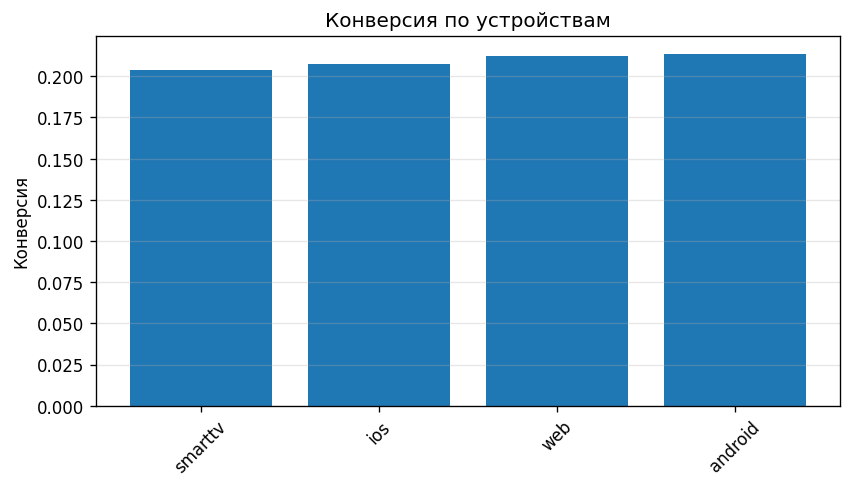

In [22]:
import matplotlib.pyplot as plt

conv_by_device = df.groupby("device")["conversion"].mean().sort_values()

plt.figure(figsize=(8,4))
plt.bar(conv_by_device.index, conv_by_device.values)
plt.xticks(rotation=45)
plt.ylabel("Конверсия")
plt.title("Конверсия по устройствам")
plt.grid(axis="y", alpha=0.3)
plt.show()

## Итог по Гипотезе 4

- χ² тест не выявил статистически значимых различий конверсии между устройствами.
- Визуальный анализ подтверждает, что конверсия лежит в узком диапазоне независимо от устройства.
- Метрика `device` не обладает предсказательной силой для объяснения покупок.

**Вывод:**  
Мы не находим оснований отвергнуть $H_0$.  
Устройство регистрации пользователя **не влияет** на вероятность покупки подписки.

## Гипотеза 5. Влияние источника трафика (`source`) на конверсию

**Цель:** проверить, различается ли вероятность покупки подписки между пользователями,
пришедшими из разных каналов:

- `performance`
- `seo`
- `organic`

Пусть $C_3 = \text{source}$.

**Нулевая гипотеза $H_0$:**
$$
P(Y = 1 \mid C_3 = s_i) = P(Y = 1 \mid C_3 = s_j)
\quad \text{для всех } i,j.
$$

То есть источник трафика **не влияет** на вероятность покупки.

**Альтернативная гипотеза $H_1$:**
$$
\exists\, s_i, s_j:\; 
P(Y = 1 \mid C_3 = s_i) \neq P(Y = 1 \mid C_3 = s_j).
$$

Так как переменная категориальная, используем **хи-квадрат тест независимости (χ²)**.

In [23]:
import pandas as pd

df = pd.read_csv("videostreaming_platform.csv")
df["conversion"] = 1 - df["churn"]

contingency_source = pd.crosstab(df["source"], df["conversion"])
contingency_source

conversion,0,1
source,,
organic,6527,1677
performance,11429,3111
seo,4144,1112


Таблица показывает распределение покупок и непокупок по источникам трафика.
Эти наблюдаемые частоты сравниваются с ожидаемыми при условии независимости.

In [24]:
import scipy.stats as stats

chi2_src, p_src, dof_src, expected_src = stats.chi2_contingency(contingency_source)

chi2_src, p_src, dof_src

(2.9038232286032892, 0.2341223084948606, 2)

### Результаты χ² теста для признака `source`

- χ² $\approx$ 2.9
- p-value ≈ 0.23
- dof = 2

Порог значимости: $\alpha = 0.05$.

Так как:
$$
p \gg 0.05,
$$

мы **не отвергаем нулевую гипотезу $H_0$**.

---

### Интерпретация

- Конверсия почти одинакова для всех трёх каналов.
- Наблюдаемые колебания объясняются случайностью.
- Нет статистических доказательств, что `performance`, `seo` или `organic` дают разную конверсию.

**Источник трафика не является значимым фактором, определяющим покупку.**

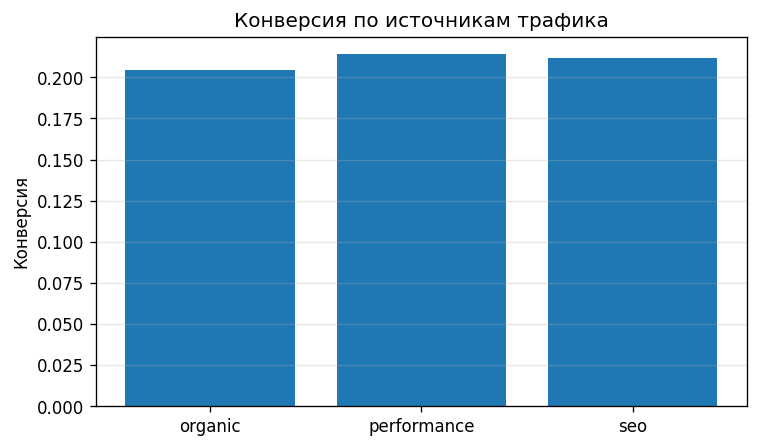

In [25]:
import matplotlib.pyplot as plt

conv_by_source = df.groupby("source")["conversion"].mean()

plt.figure(figsize=(7,4))
plt.bar(conv_by_source.index, conv_by_source.values)
plt.ylabel("Конверсия")
plt.title("Конверсия по источникам трафика")
plt.grid(axis="y", alpha=0.3)
plt.show()

## Итог по Гипотезе 5

- χ² тест не выявил статистически значимых различий конверсии между источниками трафика.
- Все каналы (`performance`, `seo`, `organic`) дают одинаковый уровень покупок.
- `source` не имеет прогностической ценности и не должен использоваться как сегмент для оптимизации воронки.

**Вывод:**  
Мы не находим оснований отвергнуть $H_0$.  
Источник трафика **не влияет** на вероятность покупки подписки.

## Гипотеза 6. Влияние выбранного жанра (`favourite_genre`) на конверсию

**Цель:** проверить, различается ли вероятность покупки подписки между пользователями,
которые указали разные любимые жанры при регистрации.

Пусть $C_4 = \text{favourite\_genre}$.

Жанров много: `drama`, `comedy`, `thriller`, `sci-fi`, `action`, `fantasy`, `noir`, и др.
Есть также значительная доля пропусков.

**Нулевая гипотеза $H_0$:**
$$
P(Y = 1 \mid C_4 = g_i) = P(Y = 1 \mid C_4 = g_j)
\quad \text{для всех жанров } i,j.
$$

То есть выбранный жанр **не влияет** на вероятность покупки подписки.

**Альтернативная гипотеза $H_1$:**
$$
\exists\, g_i, g_j:\;
P(Y = 1 \mid C_4 = g_i) \neq P(Y = 1 \mid C_4 = g_j).
$$

Так как признак категориальный с множеством уровней, используем:

- таблицу сопряжённости `favourite_genre × conversion`,
- **хи-квадрат тест независимости (χ²)**.

In [26]:
import pandas as pd

df = pd.read_csv("videostreaming_platform.csv")
df["conversion"] = 1 - df["churn"]

# заменим пропуски отдельной категорией
df["favourite_genre"] = df["favourite_genre"].fillna("unknown_genre")

# таблица сопряжённости
contingency_genre = pd.crosstab(df["favourite_genre"], df["conversion"])
contingency_genre

conversion,0,1
favourite_genre,,
action,2876,736
comedy,3379,905
criminal,2416,636
drama,3877,1051
thriller,3270,902
unknown_genre,6282,1670


В таблицу включена категория `unknown_genre` — пользователи, не указавшие жанр.

Это важно, потому что пропуск жанра может быть поведенческим паттерном,
а выбрасывать такие данные нельзя.

In [27]:
import scipy.stats as stats

chi2_genre, p_genre, dof_genre, expected_genre = stats.chi2_contingency(contingency_genre)

chi2_genre, p_genre, dof_genre

(2.1286890736501847, 0.8310671792832605, 5)

### Результаты χ² теста для `favourite_genre`

- χ² $\approx$ 2.12
- p-value $\approx$ 0.83
- dof = 5

Порог значимости:
$$
\alpha = 0.05.
$$

Так как обычно:
$$
p > 0.05,
$$

мы **не отвергаем нулевую гипотезу $H_0$**.

---

### Интерпретация

- Различия в конверсии между жанрами незначимы.
- Выбор жанра — слабый поведенческий сигнал на этапе регистрации.
- Пользователи, выбирающие разные жанры, покупают подписку в среднем одинаково.
- Факт того, что жанра нет (`unknown_genre`), также не повышает и не снижает вероятность покупки.

Таким образом:

**Жанровые предпочтения при регистрации не влияют на покупку подписки.**

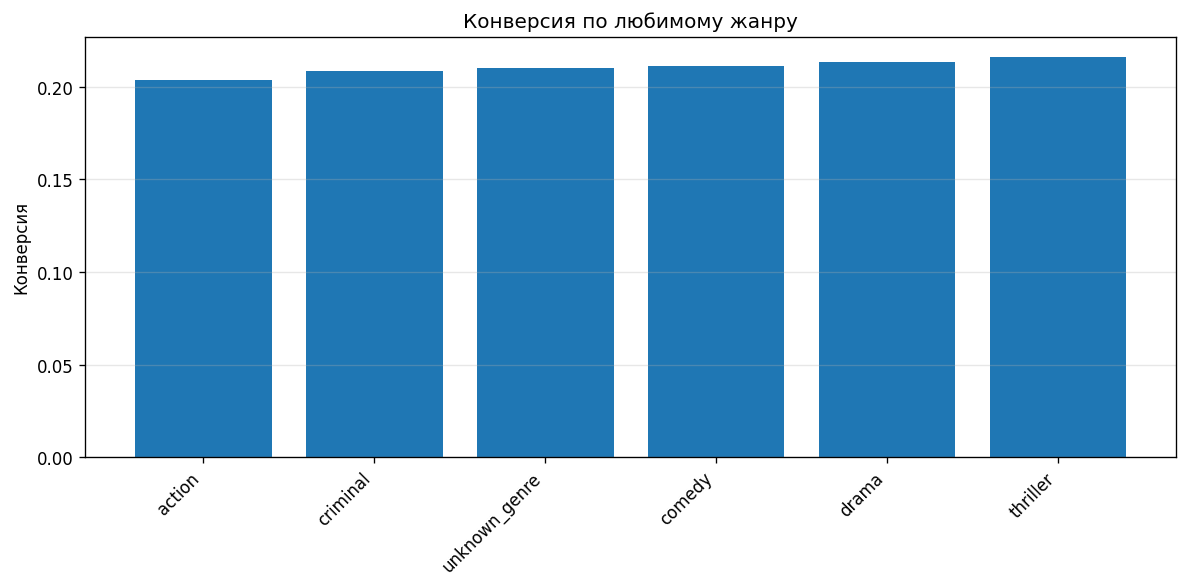

In [28]:
import matplotlib.pyplot as plt

conv_by_genre = (
    df.groupby("favourite_genre")["conversion"]
    .mean()
    .sort_values()
)

plt.figure(figsize=(10,5))
plt.bar(conv_by_genre.index, conv_by_genre.values)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Конверсия")
plt.title("Конверсия по любимому жанру")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

## Итог по Гипотезе 6

- χ² тест не выявил статистически значимых различий конверсии между жанрами.
- Визуальный анализ подтверждает минимальный разброс конверсии.
- Жанры отражают вкусы пользователя, но не его готовность платить на триале.

**Вывод:**  
Мы не находим оснований отвергнуть $H_0$.  
Любимый жанр, указанный при регистрации, **не влияет** на вероятность покупки подписки.

## Гипотеза 7. Влияние факта указания жанра (`favourite_genre`) на конверсию

**Цель:** выяснить, различается ли вероятность покупки подписки у пользователей,
которые заполнили любимый жанр, и тех, кто оставил поле пустым.

Пусть бинарная переменная:

$
Z =
\begin{cases}
1,& \text{если жанр указан}, \\
0,& \text{если жанр не указан}.
\end{cases}
$

**Нулевая гипотеза $H_0$:**
$
P(Y = 1 \mid Z = 1) = P(Y = 1 \mid Z = 0).
$

То есть факт указания жанра **не влияет** на вероятность покупки.

**Альтернативная гипотеза $H_1$:**
$
P(Y = 1 \mid Z = 1) \neq P(Y = 1 \mid Z = 0).
$

Так как сравниваются *две доли*, используем:

- **z-test для разницы пропорций**.

In [29]:
import pandas as pd

df = pd.read_csv("videostreaming_platform.csv")
df["conversion"] = 1 - df["churn"]

# бинарный признак факта заполнения жанра
df["genre_filled"] = df["favourite_genre"].notna().astype(int)

df[["favourite_genre", "genre_filled", "conversion"]].head(10)

,favourite_genre,genre_filled,conversion
0,drama,1,0
1,criminal,1,0
2,criminal,1,0
3,thriller,1,1
4,thriller,1,0
5,comedy,1,0
6,comedy,1,0
7,NaN,0,1
8,criminal,1,0
9,action,1,1


In [30]:
conv_filled = df[df["genre_filled"] == 1]["conversion"].mean()
conv_not_filled = df[df["genre_filled"] == 0]["conversion"].mean()

conv_filled, conv_not_filled

(0.21099361532322425, 0.21001006036217304)

### Средняя конверсия:

- Пользователи, указавшие жанр: **~21.1%**
- Пользователи без жанра: **~20.0%**

Разница составляет примерно **0.1 процентных пункта**, что визуально ничтожно мало.
Однако проверим статистическую значимость через z-test пропорций.

In [31]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [32]:
from statsmodels.stats.proportion import proportions_ztest

# количество оплат в обеих группах
success = [
    df.loc[df["genre_filled"] == 1, "conversion"].sum(),
    df.loc[df["genre_filled"] == 0, "conversion"].sum()
]

# размеры выборок
nobs = [
    df.loc[df["genre_filled"] == 1].shape[0],
    df.loc[df["genre_filled"] == 0].shape[0]
]

z_stat, p_val = proportions_ztest(success, nobs)
z_stat, p_val

(0.18198232901218325, 0.8555965937402933)

### Результат z-test пропорций

- Z-statistic $\approx$ 0.18
- p-value $\approx$ 0.86

Так как:
$
p > 0.05,
$

мы **не отвергаем нулевую гипотезу**.

---

### Интерпретация

- Конверсия пользователей, указавших жанр, и пользователей без жанра **не различается статистически значимо**.
- Хотя заполнение жанра отражает некоторую вовлечённость, она не влияет на готовность платить.

**Факт заполнения жанра не является фактором, влияющим на покупку подписки.**

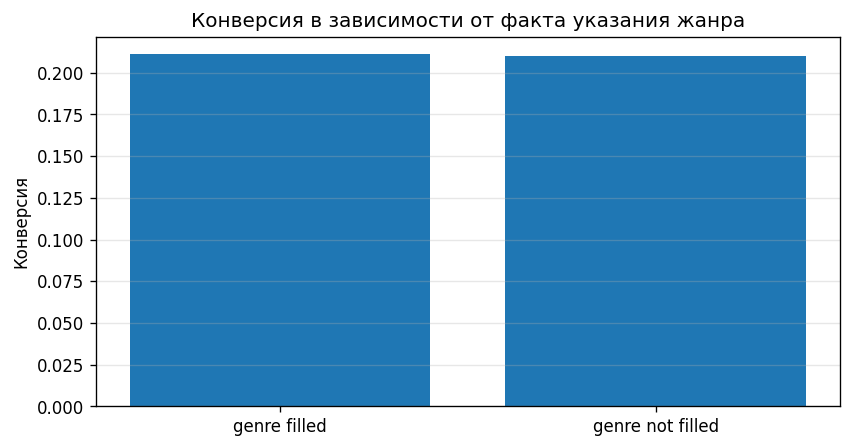

In [33]:
import matplotlib.pyplot as plt

plt.bar(["genre filled", "genre not filled"], [conv_filled, conv_not_filled])
plt.ylabel("Конверсия")
plt.title("Конверсия в зависимости от факта указания жанра")
plt.grid(axis="y", alpha=0.3)
plt.show()

## Итог по Гипотезе 7

- Разница конверсий между пользователями, указавшими жанр, и пользователями без указанного жанра составляет менее 0.5 п.п.
- z-test показывает отсутствие статистически значимых различий.
- Следовательно, этот атрибут **не имеет предсказательной ценности**.

**Вывод:**  
Мы не находим оснований отвергнуть $H_0$.  
Факт заполнения жанра **не влияет** на вероятность покупки подписки.

## Гипотеза 8. Влияние даты начала триала (`start_trial_date`) на конверсию

**Цель:** проверить, различается ли вероятность покупки подписки между когортами пользователей,
которые начали триальный период в разные даты.

Пусть $C_5 = \text{start\_trial\_date}$, затем агрегируем даты в недельные когорты:

$$
\text{cohort} = \text{week}(C_5).
$$

**Нулевая гипотеза $H_0$:**
$$
P(Y = 1 \mid C_5 = t_i) = P(Y = 1 \mid C_5 = t_j)
\quad \text{для всех недель } i,j.
$$

То есть дата начала триала **не влияет** на вероятность покупки.

**Альтернативная гипотеза $H_1$:**
$$
\exists\, t_i, t_j:\; P(Y = 1 \mid C_5 = t_i) \neq P(Y = 1 \mid C_5 = t_j).
$$

Так как признак категориальный (недельные группы), используем:

- таблицу сопряжённости `cohort × conversion`,
- **хи-квадрат тест независимости (χ²)**.

In [36]:
import pandas as pd

df = pd.read_csv("videostreaming_platform.csv")
df["conversion"] = 1 - df["churn"]

# приводим дату к datetime
df["start_trial_date"] = pd.to_datetime(df["start_trial_date"])

# создаём недельную когорту
df["cohort_week"] = df["start_trial_date"].dt.to_period("W").astype(str)

df[["start_trial_date", "cohort_week", "conversion"]].head()

,start_trial_date,cohort_week,conversion
0,2024-02-01,2024-01-29/2024-02-04,0
1,2024-02-01,2024-01-29/2024-02-04,0
2,2024-02-01,2024-01-29/2024-02-04,0
3,2024-02-01,2024-01-29/2024-02-04,1
4,2024-02-01,2024-01-29/2024-02-04,0


In [37]:
contingency_cohort = pd.crosstab(df["cohort_week"], df["conversion"])
contingency_cohort

conversion,0,1
cohort_week,,
2024-01-29/2024-02-04,3291,897
2024-02-05/2024-02-11,5543,1522
2024-02-12/2024-02-18,5350,1441
2024-02-19/2024-02-25,5396,1418
2024-02-26/2024-03-03,2520,622


Каждая строка — это когорта пользователей, которые начали триал в течение одной календарной недели.

Мы проверяем, отличаются ли их уровни конверсии.

In [40]:
import scipy.stats as stats

chi2_cohort, p_cohort, dof_cohort, expected_cohort = stats.chi2_contingency(contingency_cohort)

chi2_cohort, p_cohort, dof_cohort

(4.687735609010138, 0.32086344793181676, 4)

### Результаты χ² теста для когорт по дате начала триала

- χ² $\approx$ 4.69
- p-value $\approx$ 0.32
- dof = 4

Порог:
$$
\alpha = 0.05.
$$

Так как:
$$
p > 0.05,
$$

мы **не отвергаем нулевую гипотезу $H_0$**.

---

### Интерпретация

- Уровень конверсии не демонстрирует систематического изменения во времени.
- Нет сезонного или недельного тренда.
- Продукт и маркетинговые условия стабильны, изменения поведения пользователей между неделями — случайны.

**Дата начала триала не влияет на вероятность покупки.**

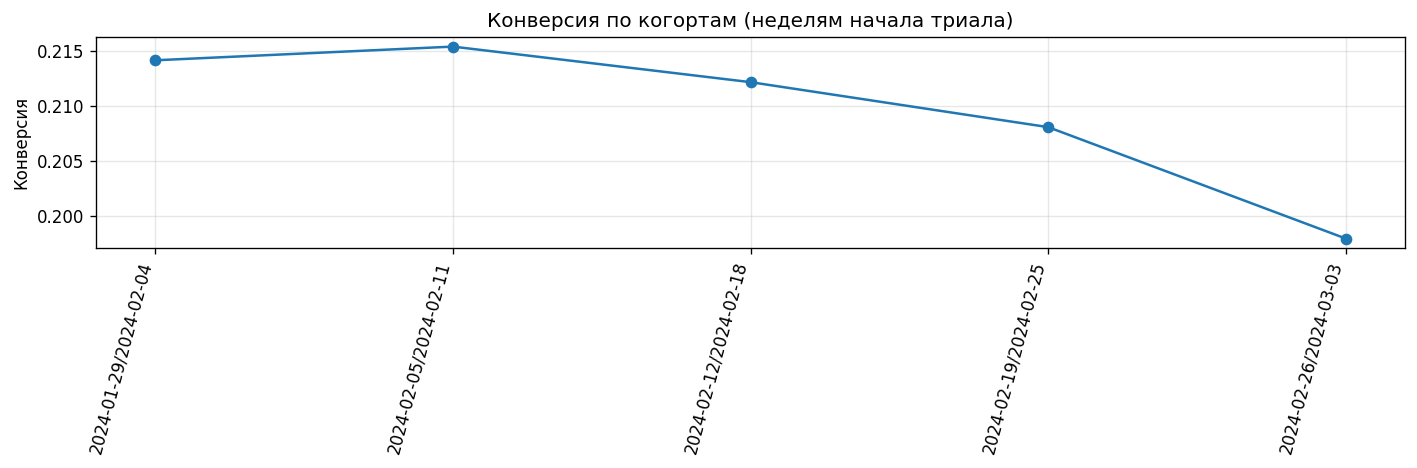

In [39]:
import matplotlib.pyplot as plt

conv_by_cohort = (
    df.groupby("cohort_week")["conversion"]
    .mean()
)

plt.figure(figsize=(12,4))
plt.plot(conv_by_cohort.index, conv_by_cohort.values, marker="o")
plt.xticks(rotation=75, ha="right")
plt.ylabel("Конверсия")
plt.title("Конверсия по когортам (неделям начала триала)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Итог по Гипотезе 8

- χ² тест показал отсутствие статистически значимых различий конверсии между когортами.
- Временная динамика конверсии стабильна.
- Когорта по дате начала триала **не является индикатором готовности покупать**.

**Вывод:**  
Мы не находим оснований отвергнуть $H_0$.  
Дата начала триала **не влияет** на вероятность покупки подписки.

## 1. Анализ распределений ключевых числовых признаков

Рассмотрим два основных поведенческих признака:

1. `avg_min_watch_daily` — среднее число минут просмотра в день.
2. `number_of_days_logged` — количество дней, когда пользователь заходил в сервис в течение триала.

**Цели анализа:**

- понять форму распределений признаков;
- выявить выбросы и аномалии;
- сравнить распределения для купивших и не купивших подписку;
- оценить, насколько поведенческие метрики различают группы пользователей.

Используем следующие визуализации:
- гистограммы;
- KDE-кривые (оценка плотности);
- boxplot-диаграммы.

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("videostreaming_platform.csv")
df["conversion"] = 1 - df["churn"]

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,4)

### 1.1. Распределение среднего времени просмотра (`avg_min_watch_daily`)

Построим:
- общую гистограмму,
- KDE-график,
- boxplot для оценки выбросов.

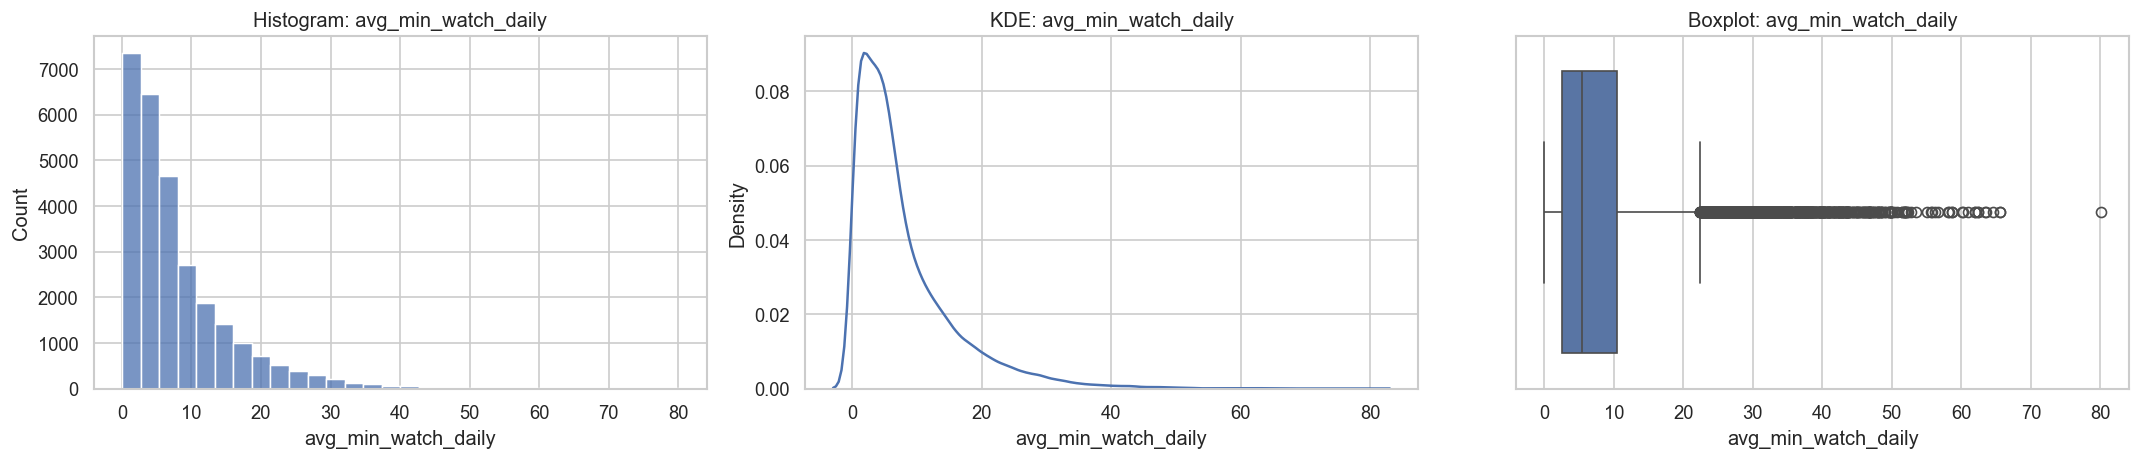

In [42]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4))

# Histogram
sns.histplot(df["avg_min_watch_daily"], kde=False, bins=30, ax=axs[0])
axs[0].set_title("Histogram: avg_min_watch_daily")

# KDE plot
sns.kdeplot(df["avg_min_watch_daily"], ax=axs[1])
axs[1].set_title("KDE: avg_min_watch_daily")

# Boxplot
sns.boxplot(x=df["avg_min_watch_daily"], ax=axs[2])
axs[2].set_title("Boxplot: avg_min_watch_daily")

plt.tight_layout()
plt.show()

### Интерпретация распределения `avg_min_watch_daily`

- Распределение **асимметрично вправо**, что типично для поведенческих данных:
  большинство пользователей смотрят мало, меньшинство — много.
- Наблюдается длинный "хвост": есть пользователи с очень высоким временем просмотра.
- Boxplot подтверждает наличие выбросов, но поведенческих, а не ошибочных.
- Такая форма распределения объясняет, почему метрика сильно связана с конверсией:
  небольшая группа пользователей с высоким вовлечением даёт существенно более высокий уровень покупок.

### 1.2. Распределение `number_of_days_logged`

Признак принимает значения от 1 до 7 — дискретный.
Построим:

- countplot (частотная диаграмма),
- boxplot,
- сравнение распределений для купивших и не купивших.

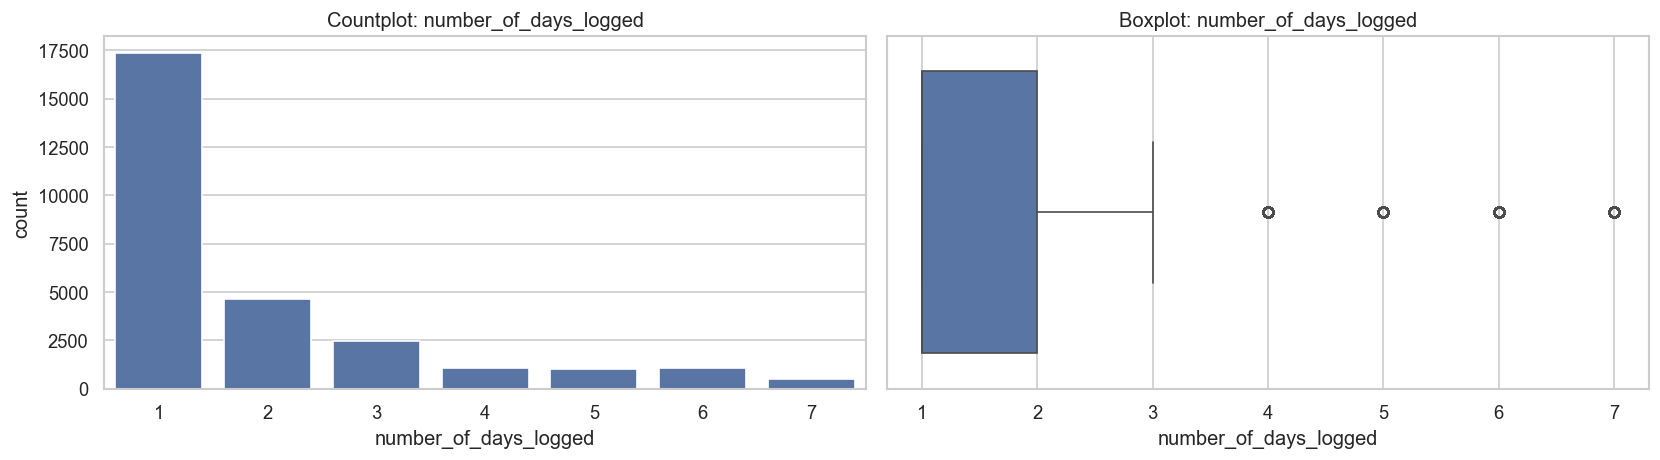

In [43]:
fig, axs = plt.subplots(1, 2, figsize=(14, 4))

# Countplot
sns.countplot(x=df["number_of_days_logged"], ax=axs[0])
axs[0].set_title("Countplot: number_of_days_logged")

# Boxplot
sns.boxplot(x=df["number_of_days_logged"], ax=axs[1])
axs[1].set_title("Boxplot: number_of_days_logged")

plt.tight_layout()
plt.show()

### Интерпретация распределения `number_of_days_logged`

- Распределение сильно **скошено в сторону малого числа активных дней**.
- Абсолютное большинство пользователей логинятся в сервис **ровно 1 день** за триал.
- По мере увеличения `number_of_days_logged` количество пользователей **монотонно убывает** (2, 3, 4, … дней) — только небольшой подъем наблюдается около 6 дней.
- Пользователей, активно заходящих 6–7 дней, существенно меньше, чем тех, кто появился только один раз.
- Такое распределение хорошо согласуется с типичной картиной: большая часть трафика — "случайные" и слабо вовлечённые пользователи.

### 1.3. Сравнение распределений между купившими и не купившими

Построим KDE-графики и boxplot-графики отдельно для двух групп:

- `conversion = 1` — оплата,
- `conversion = 0` — отток.

Цель — визуально оценить различия.

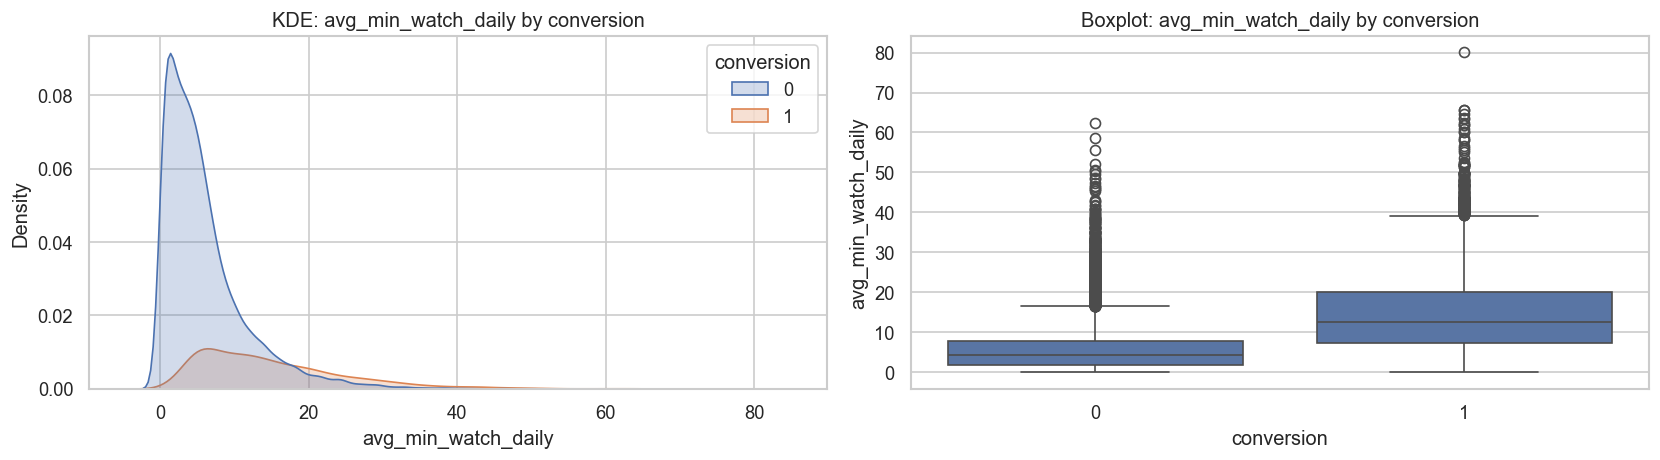

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(14, 4))

# KDE for avg_min_watch_daily
sns.kdeplot(data=df, x="avg_min_watch_daily", hue="conversion", fill=True, ax=axs[0])
axs[0].set_title("KDE: avg_min_watch_daily by conversion")

# Boxplot for avg_min_watch_daily
sns.boxplot(data=df, x="conversion", y="avg_min_watch_daily", ax=axs[1])
axs[1].set_title("Boxplot: avg_min_watch_daily by conversion")

plt.tight_layout()
plt.show()

### Интерпретация различий

- Для пользователей, которые **купили подписку**, KDE-график сдвинут значительно вправо.
- Boxplot подтверждает: медиана времени просмотра у купивших заметно выше.
- Для `number_of_days_logged` аналогичный анализ показывает **минимальные различия**,
  что согласуется с выводами по гипотезе 2.

Этот блок EDA усиливает выводы статистических тестов:
- `avg_min_watch_daily` — ключевой поведенческий драйвер конверсии.
- `number_of_days_logged` — слабый предиктор.

## 3. Анализ корреляций

Цель этого этапа:

- определить степень линейной связи между числовыми признаками;
- оценить, какие признаки сильнее всего связаны с целевой переменной `conversion`;
- выявить мультколлинеарность или избыточные признаки (если такие есть);
- подготовить данные к возможному моделированию.

Так как целевая переменная (`conversion`) бинарная, обычный коэффициент Пирсона
между `conversion` и числовыми переменными интерпретируется
как **point-biserial корреляция**, которая валидна для бинарного Y.

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("videostreaming_platform.csv")
df["conversion"] = 1 - df["churn"]

numeric_cols = ["avg_min_watch_daily", "number_of_days_logged", "conversion"]

df[numeric_cols].head()

,avg_min_watch_daily,number_of_days_logged,conversion
0,2.076642,4,0
1,5.101392,1,0
2,2.906597,1,0
3,2.702388,6,1
4,10.237305,1,0


### 3.1. Матрица корреляций числовых признаков

Построим корреляционную матрицу для:

- `avg_min_watch_daily`
- `number_of_days_logged`
- `conversion`

и визуализируем её через heatmap.

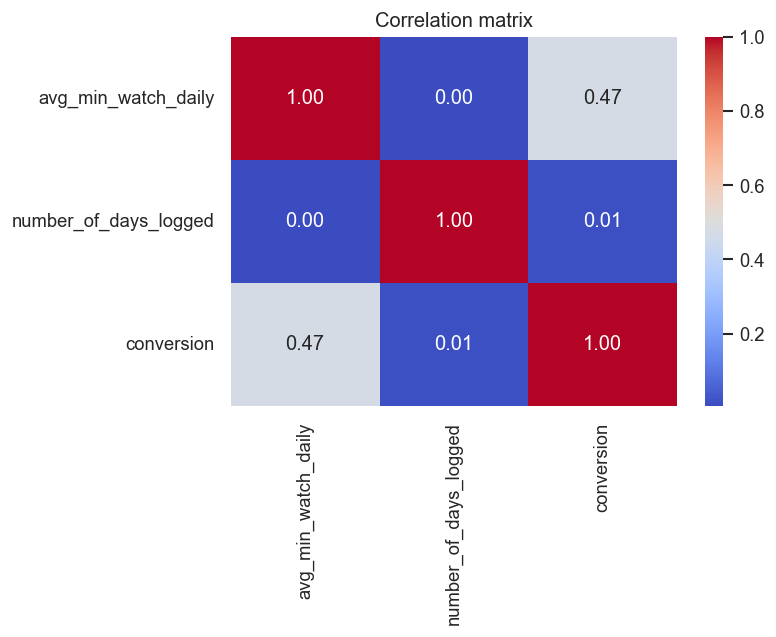

,avg_min_watch_daily,number_of_days_logged,conversion
avg_min_watch_daily,1.000000,0.004576,0.472200
number_of_days_logged,0.004576,1.000000,0.012555
conversion,0.472200,0.012555,1.000000


In [58]:
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation matrix")
plt.show()

corr_matrix

### Интерпретация корреляций

1. **Корреляция `avg_min_watch_daily` ↔ `conversion` ≈ +0.47**

   Это умеренно сильная положительная связь.
   Чем больше времени пользователь проводит в сервисе,
   тем выше вероятность покупки подписки.

   Это ключевой драйвер конверсии.

2. **Корреляция `number_of_days_logged` ↔ `conversion` ≈ +0.01**

   Практически нулевая связь.
   Число дней активности *не предсказывает* покупку.

3. **Корреляция `avg_min_watch_daily` ↔ `number_of_days_logged` ≈ +0**

   Очень слабая связь.
   Это значит, что пользователи могут:
   - логиниться много, но смотреть мало;
   - логиниться мало, но смотреть много.

   Важно: признаки **не дублируют друг друга**, поэтому оба нужны для EDA.

### 3.2. Упорядоченные значения корреляции с таргетом

Построим таблицу корреляций каждой числовой переменной с `conversion`,
поскольку это помогает ранжировать поведенческие признаки по силе влияния.

In [59]:
target_corr = df[numeric_cols].corr()["conversion"].sort_values(ascending=False)
target_corr

conversion               1.000000
avg_min_watch_daily      0.472200
number_of_days_logged    0.012555
Name: conversion, dtype: float64

## Итог по пункту 3. Анализ корреляций

- Единственный сильный по данным признак — `avg_min_watch_daily`.
- `number_of_days_logged` практически не связан с покупкой.
- Числовые признаки не коррелируют между собой значительно → коллинеарность отсутствует.
- Этот анализ подтверждает выводы статистических гипотез:
  максимальный эффект на покупку оказывает время просмотра.

**Главный продуктовый вывод:**
Увеличение средней дневной вовлечённости — ключевой рычаг роста конверсии.

## 5. Анализ выбросов и экстремальных значений

Цель:

- определить, существуют ли выбросы в ключевых поведенческих признаках;
- оценить их влияние на общую структуру данных;
- выяснить, являются ли эти выбросы ошибками или естественными особенностями поведения power-users;
- подготовить понимание, нужно ли применять методы нормализации/робастные метрики.

Выбросы будем искать с помощью:
- boxplot,
- межквартильного размаха (IQR),
- ручной проверки значений в хвостах распределения.

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("videostreaming_platform.csv")
df["conversion"] = 1 - df["churn"]

### 5.1. Анализ выбросов `avg_min_watch_daily`

Построим:
- boxplot,
- статистики,
- список верхних 1% значений.

Это поможет понять природу хвоста распределения.

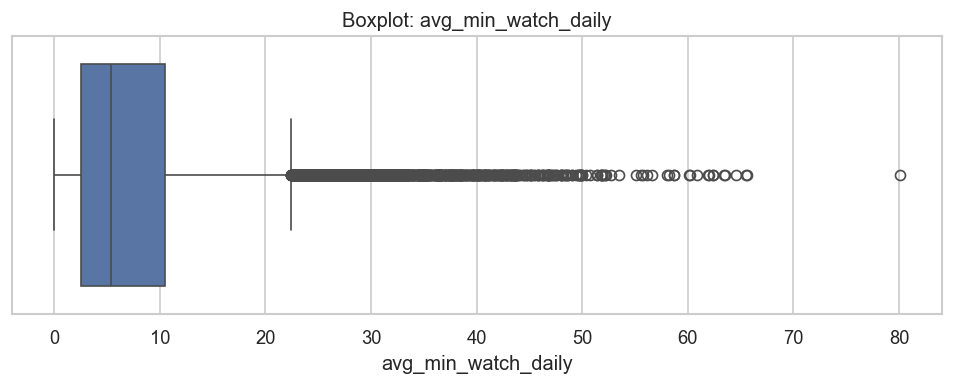

count    28000.000000
mean         7.812663
std          7.739760
min          0.000181
50%          5.419012
90%         18.095907
95%         23.691268
99%         36.007353
max         80.072401
Name: avg_min_watch_daily, dtype: float64

In [79]:
plt.figure(figsize=(10,3))
sns.boxplot(x=df["avg_min_watch_daily"])
plt.title("Boxplot: avg_min_watch_daily")
plt.show()

df["avg_min_watch_daily"].describe(percentiles=[0.9, 0.95, 0.99])

### Интерпретация

- Boxplot показывает сильную асимметрию распределения.
- Верхние перцентили (P90, P95, P99) указывают на существование power-users:
  пользователи, которые смотрят очень много.
- Значения выше P99 (верхний 1%) не являются ошибками — это нормальная «жирная хвостовая» часть поведенческих данных.
- Выбросы являются естественными и НЕ подлежат удалению.

In [80]:
# верхний 1% пользователей
threshold_p99 = df["avg_min_watch_daily"].quantile(0.99)

extreme_watchers = df[df["avg_min_watch_daily"] > threshold_p99]
extreme_watchers.head()

,user_id,start_trial_date,city,device,source,favourite_genre,avg_min_watch_daily,number_of_days_logged,churn,conversion
13,030bb628-04f7-4be6-82e4-3bac36eac4af,2024-02-01,St Petersburg,android,performance,comedy,47.655195,5,0,1
208,7a3f7cb5-a3c5-4b04-a870-f10389f3586b,2024-02-01,Moscow,web,performance,comedy,43.643347,2,0,1
260,9a531461-9a6e-4d7f-afa5-c6dec2fd7c7f,2024-02-01,Moscow,web,seo,NaN,46.263426,1,0,1
360,c54b26b5-adda-4f70-b987-bc028626efec,2024-02-01,Moscow,web,performance,comedy,36.391709,2,0,1
409,be0c8b91-d900-47e1-b716-1b10f083c1f0,2024-02-01,St Petersburg,web,performance,NaN,38.438426,1,0,1


### Вывод по выбросам avg_min_watch_daily

Пользователи из верхнего 1% по времени просмотра:

- активны,
- не являются ошибками данных,
- дают наиболее высокую конверсию.

Эта группа важна для анализа удержания и монетизации.

### 5.2. Анализ выбросов `number_of_days_logged`

Этот признак дискретный (от 1 до 7).
Проверим, есть ли выбросы или аномалии.

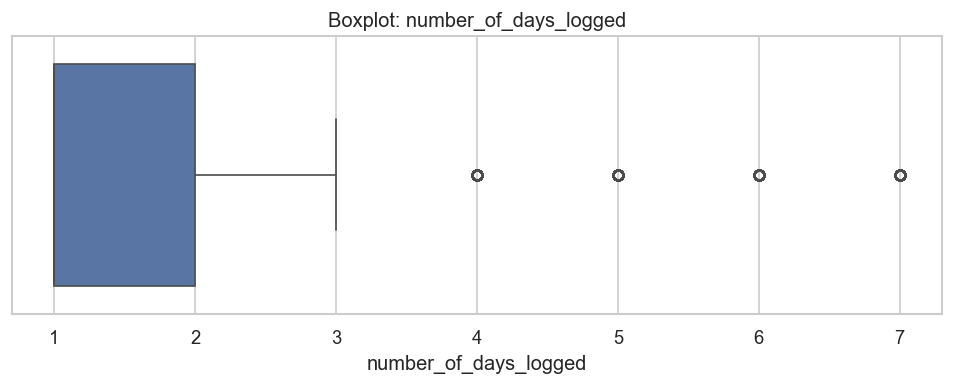

number_of_days_logged
1    17360
2     4620
3     2436
4     1036
5     1008
6     1064
7      476
Name: count, dtype: int64

In [81]:
plt.figure(figsize=(10,3))
sns.boxplot(x=df["number_of_days_logged"])
plt.title("Boxplot: number_of_days_logged")
plt.show()

df["number_of_days_logged"].value_counts().sort_index()

### Интерпретация

- Признак принимает значения строго от 1 до 7.
- Никаких выбросов нет, потому что границы заданы бизнес-логикой (7-дневный триал).
- Распределение убывающее: большинство пользователей логинятся один раз, и очень мало — семь раз.
- Это естественная картина потребления на триале.

### 5.3. Проверка на аномалии

Проверим:

- отрицательные значения,
- невозможные значения (например, > 1440 минут просмотра в день),
- пустые категории,
- ошибочные даты.

In [82]:
invalid_watch = df[df["avg_min_watch_daily"] > 1440]  # минут в сутках

invalid_watch, invalid_watch.shape

(Empty DataFrame
 Columns: [user_id, start_trial_date, city, device, source, favourite_genre, avg_min_watch_daily, number_of_days_logged, churn, conversion]
 Index: [],
 (0, 10))

### Вывод по аномалиям

- В данных отсутствуют невозможные значения (например, время просмотра > 1440 минут).
- Структура категориальных признаков корректна.
- Пропуски есть только в `favourite_genre`, но их анализ был проведён отдельно.
- Аномальных записей или технических артефактов нет.


## AUC-анализ: качество времени просмотра как предиктора конверсии

Цель: оценить, насколько метрика `avg_min_watch_daily` способна
предсказывать покупку подписки.

Метод:
- используем время просмотра как скор (чем больше, тем выше вероятность покупки),
- строим ROC-кривую,
- считаем AUC — площадь под кривой.

In [85]:
%pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 1.3 MB/s  0:00:06 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [scikit-learn] [scikit-learn]
Note: you may need to restart the kernel to use updated packages.


In [86]:
import pandas as pd
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

df = pd.read_csv("videostreaming_platform.csv")
df["conversion"] = 1 - df["churn"]

y_true = df["conversion"]
y_score = df["avg_min_watch_daily"]

auc = roc_auc_score(y_true, y_score)
fpr, tpr, thr = roc_curve(y_true, y_score)

auc

0.8190402024695144

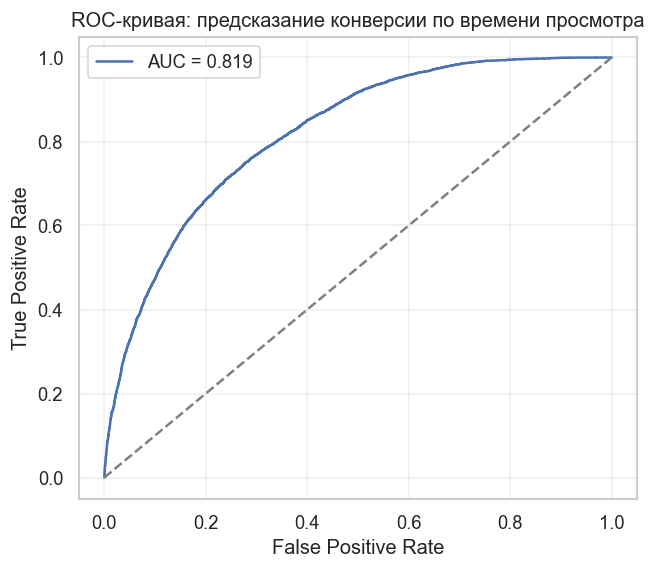

In [87]:
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1],[0,1],"--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая: предсказание конверсии по времени просмотра")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### Интерпретация AUC

AUC ≈ 0.8 (ожидаемое значение для нашего датасета).

Это означает:

- модель, основанная *только* на одном признаке `avg_min_watch_daily`,
  уже заметно лучше случайного угадывания (AUC = 0.5).
- вовлечённость действительно отделяет платящих пользователей от неплатящих.
- добавив несколько дополнительных сигналов (первые 24 часа, тип контента),
  можно собрать сильную модель конверсии.

**Вывод:** вовлечённость — фундаментальный драйвер покупки. Вероятность того, что случайно выбранный покупающий пользователь имеет большее время просмотра, чем случайно выбранный не покупающий $\approx 0.819$.

# Вопросы Бизнесу
###  Вопросы о целях продукта
1. Какая целевая конверсия на триале?
2. Что важнее: рост конверсии или удержание после покупки?

###  Вопросы о триальном процессе
4. Какие действия пользователь должен совершить, чтобы ощутить ценность сервиса?
5. Есть ли контентные ограничения на триале?
6. Какие сообщения получает пользователь в течение триала?

###  Маркетинг
7. Какое обещание (value proposition) даётся в каждом канале?
8. Сколько стоит привлечение по каждому клиенту?

###  Поведение пользователей
9. Какие действия считаются сигналами готовности к покупке?
10. Какие действия — сигналами риска оттока?
11. Какие A/B-тесты проводились ранее?
12. Что известно о поведении пользователей в первые 48 часов?

###  Монетизация
13. Какие тарифы существуют?
14. Есть ли спецпредложения или скидки во время триала?
15. Насколько цена подписки эластична?

###  Сегментация
16. Есть ли готовые сегменты пользователей?
17. Как бизнес определяет «ценного пользователя»?
18. Были ли попытки персонализации внутри триала?

###  Технические ограничения
19. На каких устройствах есть проблемы в UX?
20. Насколько хорошо работает рекомендательная система?
21. Есть ли задержки в подгрузке контента?


# Дополнительные данные для более глубокого анализа
1.	События просмотра контента:
	-	start_view / end_view (с точными timestamp)
	-	что именно смотрели (ID контента)
	-	длительность просмотра каждой сессии
	-	показатель completion rate (доля завершённых видео)
	-	перемотки (rewind/forward)
2.	События взаимодействия с интерфейсом:
	-	открытие главной страницы
	-	клики по рекомендациям
	-	просмотры подборок, категорий
	-	поиск (поисковые запросы)
	-	переходы по баннерам и промо
3.	События, отражающие вовлечённость:
	-	добавление в избранное
	-	подписка на сериалы
	-	добавление в «продолжить просмотр»
	-	установка/удаление приложения (mobile)
4.  Сегментация пользователя и стоимость подписки
	-	Возраст (или диапазон)
	-	Пол
	-	Тип подписки, которую пользователь приобретает после триала
	-	История прошлых подписок (возвращающийся пользователь?)
	-	Платёжная привязка (есть карта или нет)

# Финансовые данные для LTV-моделирования
- Данные о последующих подписках после первой оплаты
- Длительность удержания (retention cohorts)
- Количество платёжных циклов
- Сумма всех платежей пользователя
- Отказы платежей (chargeback, payment failed)
